<a href="https://colab.research.google.com/github/maferjmnz/LINEAS-DE-TIEMPO-2023/blob/main/EVIDENCIA_MFJV_A00832362.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnologico y de Estudios Superiores de Monterrey
# Series de Tiempo
### Grupo 102
### María Fernanda Jiménez Vázquez A00832362
### Licenciatura en Estrategia y Transformación de Negocios (LAET)
#### 13 de Febrero del 2023- 17 de Marzo del 2023

**INTRODUCCIÓN**

Una serie de tiempo es una secuencia de datos ordenados cronológicamente en el tiempo mediante intervalos regulares.

Para este trabajo se utilizo el enfoque estocástico, un proceso estocástico es un conjunto de variables aleatorias que dependen del tiempo. 

Para poder realizar un prónostico por medio del enfoque estocástico es necesario seguir los siguientes pasos:
1. Graficar la serie (la serie debe contener fechas y la variable que se vaya a analizar, por ejemplo: precio de la acción, inflación, etc).
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario.
3. Si el proceso no es estacionario, lo hacemos estacionario por medio de diferenciación; si ya es estacionario procedemos al siguiente paso.
4. Identificar qué tipo de proceso estacionario es con base al criterio Akaike y Bayesanio.
5. Identificado el proceso, realizar el pronóstico de la serie.

Cuando el p - value es < 0.05, la serie no es estacionaria. Para volverla estacionaria tenemos que hacer una diferenciación, lo que significa que a cada valor de la serie se le restará su valor anterior. 

Las series de tiempo son funcionales para los primeros 5 periodos, después solo pronostica una constante. Además. que no se pueden pronosticar cambios de forma efectiva ya que arrastra la tendencia más reciente.

**LA INFLACIÓN EN MÉXICO**


*   ¿Qué es la inflación?

Fenómeno relacionado con el aumento desordenado de los precios de la mayor parte de los bienes y servicios por un tiempo prolongado.

*   ¿Cómo se mide la inflación en México?

El INEGI hace encuentas del ingreso y gasto de las familias a nivel nacional, una vez identificador los productos se le da seguimiento a 235 mil precios en 46 ciudades del país mensualmente.

*   ¿Qué es el INCP?

Índice Nacional de Precios al Consumidor, número que refleja como van variando los precios de un conjunto de bienes y servicios que consumen las familias en México.

*   ¿Cómo afecta la inflación a la planeación financiera de las empresas?

- Reducción de los margenes

Ya que los costos adquisitivos de bienes, materias primas entre otras cosas aumenta con la inflación.

- Problemas de liquidez

Las personas ya no tienen el mismo poder adquisitivo por lo cual las empresas deben bajar sus precios para poder seguir siendo atractivas; o en su caso la demanda de sus productos disminuye. 

**Pronóstico de la inflación en México**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [27]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [28]:
inflacion_mexico = pd.read_csv("/content/drive/MyDrive/inflacion_mex_62.csv")

In [29]:
inflacion_mexico

,fecha,inflacion_12
0,2000/01,11.02
1,2000/02,10.52
2,2000/03,10.11
3,2000/04,9.73
4,2000/05,9.48
...,...,...
273,2022/10,8.41
274,2022/11,7.80
275,2022/12,7.82
276,2023/01,7.91


In [30]:
inflacion_mexico['fecha'] = pd.to_datetime(inflacion_mexico['fecha'], format='%Y/%m')

In [31]:
inflacion_mexico = inflacion_mexico.set_index('fecha')

In [32]:
inflacion_mexico.index.freq = pd.infer_freq(inflacion_mexico.index)

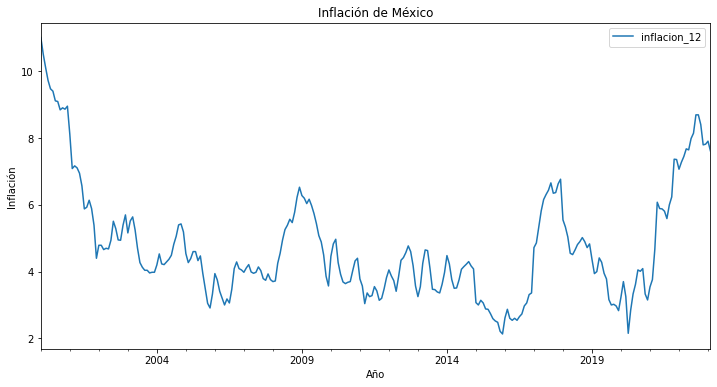

In [33]:
inflacion_mexico.plot()
plt.title('Inflación de México')
plt.xlabel('Año')
plt.ylabel('Inflación')
plt.show()

In [34]:
result_adf = adfuller(inflacion_mexico['inflacion_12'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


Recuerde que

𝐻0: serie No estacionaria

𝐻𝑎: serie estacionaria

regla de decisión si el p-valor <𝛼 entonces rechazar 𝐻0

con un 𝛼=0.05

**Conclusión: 0.05 = 0.05, por lo cual no rechazamos H0, la serie no es estacionaria**




*Vamos a diferenciar la serie para volverla estacionaria*

In [35]:
inflacion_mexico['inflacion_diff'] = inflacion_mexico['inflacion_12'].diff()

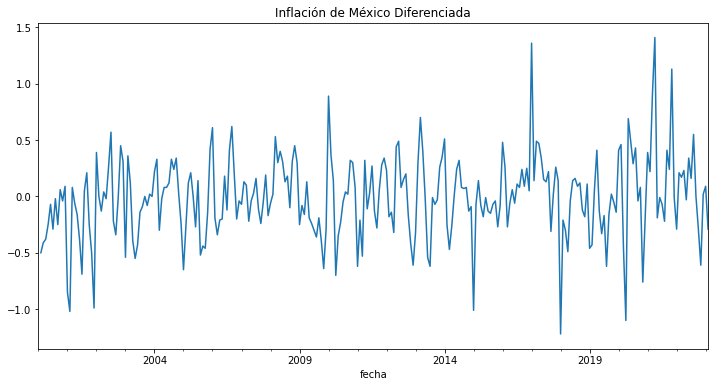

In [36]:
inflacion_mexico['inflacion_diff'].plot()
plt.title('Inflación de México Diferenciada')
plt.show()

*Realizamos la prueba de raíces unitaria*

In [37]:
result_adf = adfuller(inflacion_mexico['inflacion_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


**Conclusión p value = 0.00 < 0.05, entonces rechazamos H0. Ahora la serie diferenciada es estacionaria.**

Si la serie es estacionaria, tratamos de identificar que proceso es, para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

Para determinar que tipo de proceso es, recurriremos a:

Función de autocorrelación ACF
Función de autocorrelación Parcial PACF

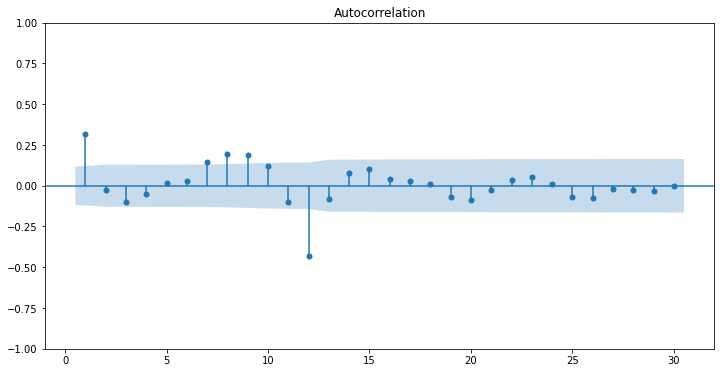

In [38]:
plot_acf(inflacion_mexico['inflacion_diff'].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


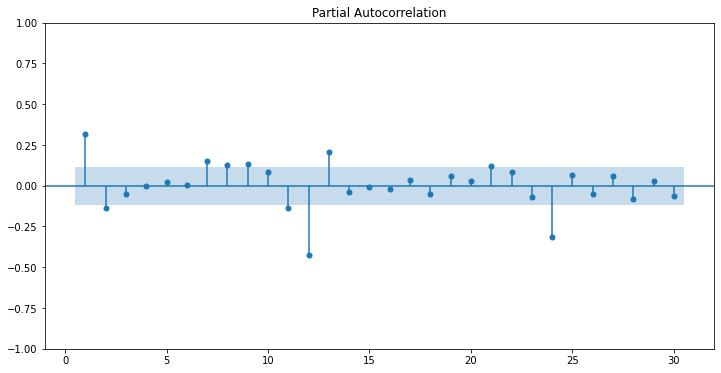

In [39]:
plot_pacf(inflacion_mexico['inflacion_diff'].dropna(), zero=False, lags=30);

*Estimamos varios modelos para elegir el proceso*

In [40]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_mexico['inflacion_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0   225.875902  233.123937
   1   195.301092  206.173144
   2   197.052927  211.548997
   3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
   1   197.136063  211.632133
   2   199.235174  217.355262
   3   199.371844  221.115949
   4   181.386305  206.754427
2  0   195.623104  210.119174
   1   197.035040  215.155128
   2   198.854833  220.598938
   3   183.895535  209.263658
   4   188.762659  217.754799
3  0   196.886055  215.006143
   1   198.885917  220.630022
   2   177.824847  203.192970
   3   178.359862  207.352002
   4   172.715337  205.331495
4  0   198.885786  220.629891
   1   182.928570  208.296693
   2   180.936431  209.928571
   3   181.214534  213.830692
   4   173.379139  209.619314

*Vamos a elegir el modelo que tiene el "mejor" criterio de Akaike (AIC), o sea el valor más pequeño*

In [41]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
3  4   172.715337  205.331495
4  4   173.379139  209.619314
3  2   177.824847  203.192970
   3   178.359862  207.352002
4  2   180.936431  209.928571
   3   181.214534  213.830692
1  4   181.386305  206.754427
4  1   182.928570  208.296693
2  3   183.895535  209.263658
   4   188.762659  217.754799
0  1   195.301092  206.173144
2  0   195.623104  210.119174
3  0   196.886055  215.006143
2  1   197.035040  215.155128
0  2   197.052927  211.548997
1  1   197.136063  211.632133
0  3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
2  2   198.854833  220.598938
4  0   198.885786  220.629891
3  1   198.885917  220.630022
1  2   199.235174  217.355262
   3   199.371844  221.115949
0  0   225.875902  233.123937

El criterio de Akaike (AIC) y el criterio bayesanio de información (BIC) nos ayudan para elegir el modelo adecuado. Elegir solo uno, BIC o AIC.

Entre más grande es el AIC/BIC es un peor modelo, de acuerdo con el criterio de Akaike el mejor modelo es un ARMA(4,4)

De acuerdo a la información anterior, es un ARIMA (3,1,4)

In [42]:
modelo = ARIMA (inflacion_mexico['inflacion_12'], order=(3,1,4)) ## ARIMA(3,1,4)
resultado = modelo.fit()  # calcula
print( resultado.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           inflacion_12   No. Observations:                  278
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 -84.422
Date:                Thu, 16 Mar 2023   AIC                            184.844
Time:                        16:09:17   BIC                            213.836
Sample:                    01-01-2000   HQIC                           196.477
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6070      0.518     -1.172      0.241      -1.623       0.408
ar.L2          0.2398      0.694      0.345      0.730      -1.121       1.601
ar.L3          0.0916      0.370      0.247      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
inflacion_mexico['inflacion_pronosticada'] = resultado.predict(1)

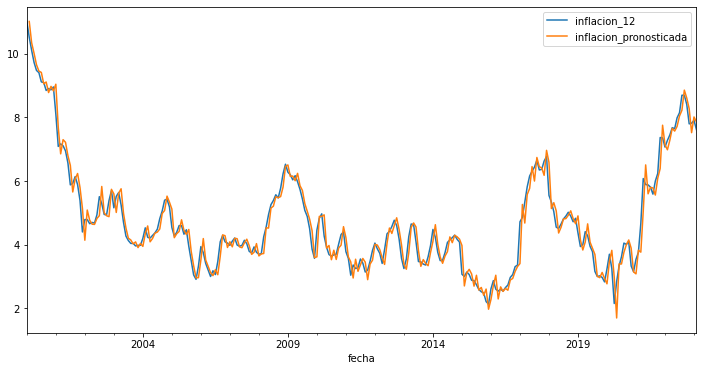

In [44]:
inflacion_mexico[['inflacion_12', 'inflacion_pronosticada']].plot();

In [45]:
inflacion_mexico.describe()

,inflacion_12,inflacion_diff,inflacion_pronosticada
count,278.000000,277.000000,277.000000
mean,4.751511,-0.012274,4.739002
std,1.677582,0.361811,1.675115
min,2.130000,-1.220000,1.695116
25%,3.625000,-0.220000,3.617730
50%,4.290000,-0.010000,4.295632
75%,5.462500,0.210000,5.513542
max,11.020000,1.410000,11.020001


In [46]:
inflacion_mexico.tail()

,inflacion_12,inflacion_diff,inflacion_pronosticada
fecha,,,
2022-10-01,8.41,-0.29,8.611506
2022-11-01,7.80,-0.61,8.278932
2022-12-01,7.82,0.02,7.523067
2023-01-01,7.91,0.09,8.016285
2023-02-01,7.62,-0.29,7.861750


In [47]:
resultado.predict(278, 283)

2023-03-01    7.586835
2023-04-01    7.500028
2023-05-01    7.599708
2023-06-01    7.566370
2023-07-01    7.602558
2023-08-01    7.581728
Freq: MS, Name: predicted_mean, dtype: float64

**El modelo pronostica que para Abril la inflación de México tendrá una variación de 7.50%**

**TIPO DE CAMBIO USD/MXN**


*   ¿Qué es el tipo de cambio?

Es una referencia usada para conocer el número de unidades de moneda nacional para obtener una moneda extranjera.
*   ¿Qué es el tipo de cambio spot y forward?

El tipo de cambio Spot o al contado hace referencia a la transacción de compra/venta con entrega inmediata

Mientras que el tipo de cambio Forward hace referencia a la transacción de compra/venta con entrega en una fecha futura, también se le conoce como "a plazo".
*   ¿Cuál es el tipo de cambio fix?
Es el que determina el Banco de México con base al promedio de cotizaciones del mercado de cambios al mayoreo para operaciones liquidables, este tipo de cambio es para operaciones pagables el segundo día hábil bancario tras el cálculo y entra al Diario Oficial de la Federación (DOF) un día hábil posterior a la fecha del cálculo.
*   ¿Cómo afecta financieramente a las empresas el tipo de cambio?

Afectan por la volatilidad, ya que permanecen en constante fluctuación y puede afectar las ingresos y egresos. Por ejemplo:
- Precios de materia prima

Algunas empresas importan sus materias primas en monedas extranjeras, por lo que el tipo de cambio las afecta. Si el tipo de cambio aumenta, disminuye la cantidad de materia prima que puedes adquirir, viseversa si el tipo de cambio disminuye podrás adquirir más materia prima o a un menor precio. 
- Operaciones con plazos de tiempo

Cuando un cliente pagará en cierto tiempo o la empresa tiene que hacer un pago aplazado, puede ocurrir que cuando llegue el plazo de vencimiento el valor de la moneda haya cambiado.







**Pronóstico del Tipo de Cambio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [5]:
tipo_cambio = pd.read_csv("/content/drive/MyDrive/tipo_de_cambio.csv")

In [6]:
tipo_cambio

,Date,tipo_cambio
0,21/03/22,20.381149
1,22/03/22,20.381901
2,23/03/22,20.272200
3,24/03/22,20.226641
4,25/03/22,20.066299
...,...,...
250,06/03/23,17.978001
251,07/03/23,18.001350
252,08/03/23,18.100100
253,09/03/23,17.970751


In [7]:
tipo_cambio['Date'] = pd.to_datetime(tipo_cambio['Date'], format='%d/%m/%y')

In [8]:
tipo_cambio = tipo_cambio.set_index('Date')

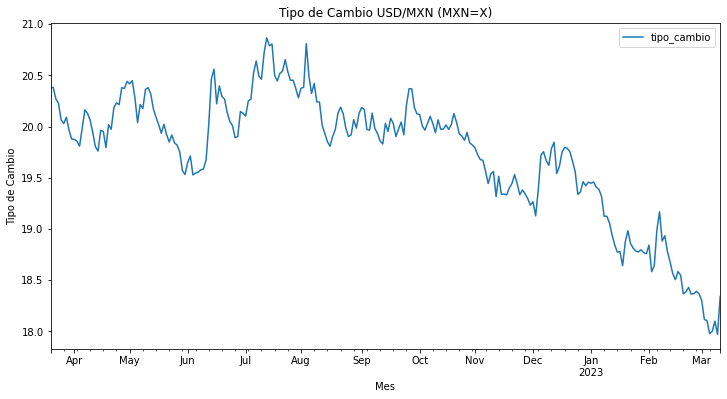

In [9]:
tipo_cambio.plot()
plt.title('Tipo de Cambio USD/MXN (MXN=X)')
plt.xlabel('Mes')
plt.ylabel('Tipo de Cambio')
plt.show()

In [10]:
result_adf = adfuller(tipo_cambio['tipo_cambio'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.74


Recuerde que

𝐻0: serie No estacionaria

𝐻𝑎: serie estacionaria

regla de decisión si el p-valor <𝛼  entonces rechazar  𝐻0

con un  𝛼=0.05

**Conclusión: 0.74>0.05**

**No rechazamos H0, por lo cual la serie no es estacionaria.** 

*Diferenciación de serie para volverla estacionaria*

In [11]:
tipo_cambio['tipo_diff'] = tipo_cambio['tipo_cambio'].diff()

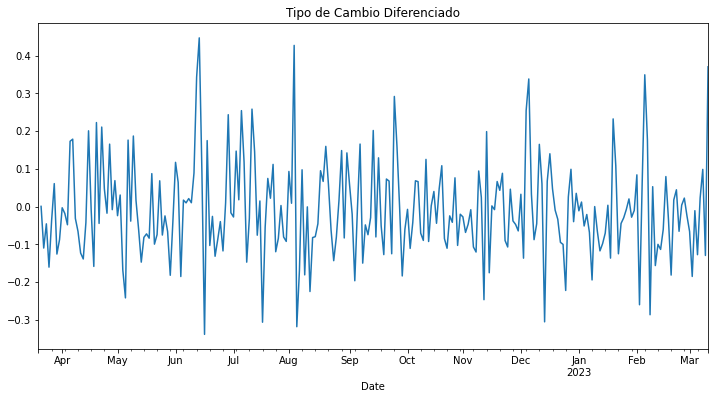

In [12]:
tipo_cambio['tipo_diff'].plot()
plt.title('Tipo de Cambio Diferenciado')
plt.show()

*Realizamos la prueba de raíces unitaria*

In [ ]:
result_adf = adfuller(tipo_cambio['tipo_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

**Conclusión p value = 0.00 < 0.05, entonces rechazamos H0. Ahora la serie diferenciada es estacionaria.**

Si la serie es estacionaria, tratamos de identificar que proceso es, para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

Para determinar que tipo de proceso es, recurriremos a:

Función de autocorrelación ACF
Función de autocorrelación Parcial PACF

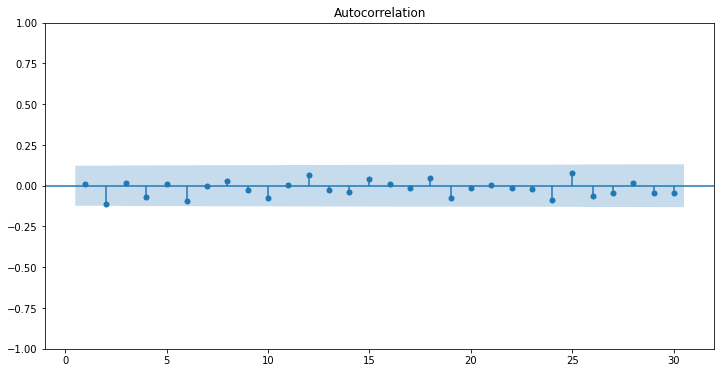

In [13]:
plot_acf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


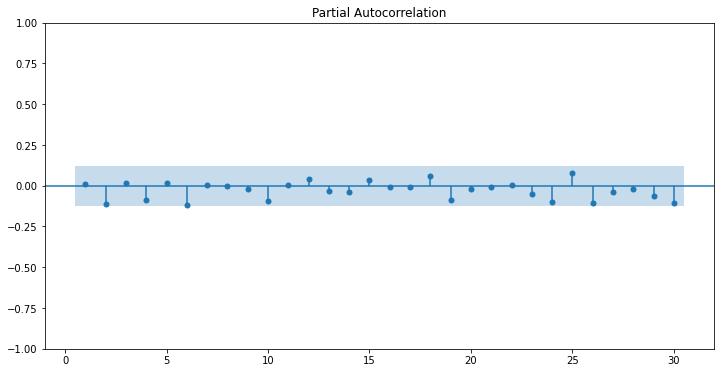

In [14]:
plot_pacf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

*Estimamos varios modelos para elegir el proceso*

In [15]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['tipo_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -320.417436 -313.342768
   1  -318.450150 -307.838148
   2  -320.544245 -306.394908
   3  -318.734628 -301.047957
   4  -319.265943 -298.041938
1  0  -318.442638 -307.830635
   1  -320.676760 -306.527423
   2  -320.372637 -302.685965
   3  -318.605362 -297.381356
   4  -317.630640 -292.869301
2  0  -319.708778 -305.559441
   1  -320.213898 -302.527227
   2  -319.522004 -298.297998
   3  -319.825078 -295.063738
   4  -316.993609 -288.694934
3  0  -317.810102 -300.123431
   1  -318.399339 -297.175333
   2  -319.834166 -295.072827
   3  -318.079475 -289.780801
   4  -315.901653 -284.065645
4  0  -317.778004 -296.553998
   1  -317.295156 -292.533816
   2  -316.671192 -288.372518
   3  -315.812080 -283.976072
   4  -313.646095 -278.272753

*Vamos a elegir el modelo que tiene el "mejor" criterio de Akaike (AIC), o sea el valor más pequeño*

In [16]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
1  1  -320.676760 -306.527423
0  2  -320.544245 -306.394908
   0  -320.417436 -313.342768
1  2  -320.372637 -302.685965
2  1  -320.213898 -302.527227
3  2  -319.834166 -295.072827
2  3  -319.825078 -295.063738
   0  -319.708778 -305.559441
   2  -319.522004 -298.297998
0  4  -319.265943 -298.041938
   3  -318.734628 -301.047957
1  3  -318.605362 -297.381356
0  1  -318.450150 -307.838148
1  0  -318.442638 -307.830635
3  1  -318.399339 -297.175333
   3  -318.079475 -289.780801
   0  -317.810102 -300.123431
4  0  -317.778004 -296.553998
1  4  -317.630640 -292.869301
4  1  -317.295156 -292.533816
2  4  -316.993609 -288.694934
4  2  -316.671192 -288.372518
3  4  -315.901653 -284.065645
4  3  -315.812080 -283.976072
   4  -313.646095 -278.272753

El criterio de Akaike (AIC) y el criterio bayesanio de información (BIC) nos ayudan para elegir el modelo adecuado. Elegir solo uno, BIC o AIC.

Entre más grande es el AIC/BIC es un peor modelo, de acuerdo con el criterio de Akaike el mejor modelo es un ARMA(4,4)

Sabemos que el tipo de cambio solo lo diferenciamos una vez, por lo tanto es un ARIMA (1,1,1)

In [17]:
modelo = ARIMA (tipo_cambio['tipo_cambio'], order=(1, 1, 1)) ## ARIMA(1,1,1)
resultado = modelo.fit()  # calcula
print( resultado.summary() ) 

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            tipo_cambio   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 163.883
Date:                Thu, 16 Mar 2023   AIC                           -321.767
Time:                        15:40:58   BIC                           -311.155
Sample:                    03-21-2022   HQIC                          -317.498
                         - 03-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7789      0.147     -5.283      0.000      -1.068      -0.490
ma.L1          0.8628      0.131      6.605      0.000       0.607       1.119
sigma2         0.0161      0.001     13.935      0.0

In [18]:
tipo_cambio['tipo_pronosticado'] = resultado.predict()

In [19]:
tipo_cambio.iloc[0]['tipo_pronosticado'] = tipo_cambio.iloc[0]['tipo_cambio']

<ipython-input-19-3128ac08461b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipo_cambio.iloc[0]['tipo_pronosticado'] = tipo_cambio.iloc[0]['tipo_cambio']


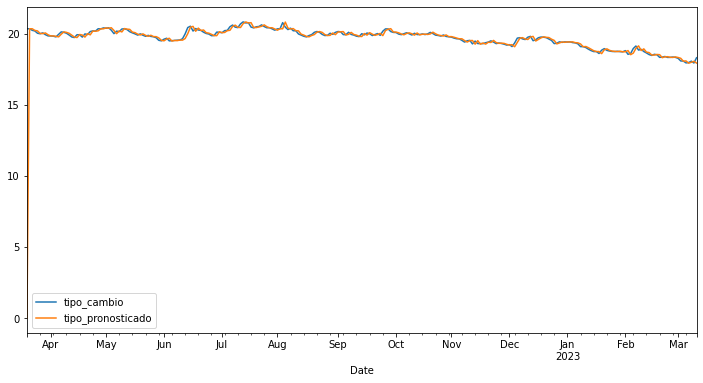

In [22]:
tipo_cambio[['tipo_cambio', 'tipo_pronosticado']].plot();

In [21]:
tipo_cambio.describe()

,tipo_cambio,tipo_diff,tipo_pronosticado
count,255.000000,254.000000,255.000000
mean,19.730705,-0.008030,19.658354
std,0.623297,0.128018,1.381863
min,17.970751,-0.338508,0.000000
25%,19.432105,-0.084462,19.422736
50%,19.908100,-0.024160,19.907088
75%,20.130930,0.063514,20.143451
max,20.866461,0.447340,20.863270


In [23]:
tipo_cambio.tail()

,tipo_cambio,tipo_diff,tipo_pronosticado
Date,,,
2023-03-06,17.978001,-0.127300,18.118686
2023-03-07,18.001350,0.023349,17.955773
2023-03-08,18.100100,0.098750,18.022487
2023-03-09,17.970751,-0.129349,18.090146
2023-03-10,18.341410,0.370659,17.968489


In [24]:
resultado.predict(253,260)

2023-03-09    18.090146
2023-03-10    17.968489
2023-03-13    18.374455
2023-03-14    18.348715
2023-03-15    18.368765
2023-03-16    18.353147
2023-03-17    18.365312
2023-03-20    18.355837
Freq: B, Name: predicted_mean, dtype: float64

**El modelo pronostica que para el 10 de Marzo el tipo de cambio será de 17.96**